# Integración de ecuaciones hidrostaticas en RG y Newton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# import astropy.constants as const

## Newtonian

In [2]:
# Constants and parameters
# G = const.G.value
# c = const.c.value

# M_sun = const.M_sun.value 
# R_sun = const.R_sun.value 
rho_0_sun = 1.5e5 # data from the sun (web)
P_0_sun = 2.5e16 # data from the sun (web)

k = 1
gamma = 2

In [3]:
# Define the ODEs
def NewtOdes(x, r, gamma):
    # a = rho_0*R**3/M
    # b = rho_0/P_0*M/R
    # l = M/R
    # mu = rho_0**gamma/P_0*k


    # Variables
    rho, m, phi = x

    # ODEs
    # drho_dr = -b/mu/gamma * G*rho**(2-gamma)*m/r**2
    # dm_dr = 4*np.pi*a*r**2*rho
    # dphi_dr = l*G/c**2*m/r**2
    drho_dr = -1/gamma * rho**(2-gamma)*m/r**2
    dm_dr = r**2*rho
    dphi_dr = m/r**2

    return [drho_dr, dm_dr, dphi_dr]

In [4]:
# integration range
rf = 100.0
#NN = 1000
dx = 1e-3 # es mejor definir el dx que el numero de puntos
NN = int((rf)/dx)
r = np.linspace(dx, rf, NN)

# initial conditions
rho_0 = 1.0 - dx**2/(6*gamma) # density at dx from the center
m_0 = dx**3/3 # mass at dx from the center
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# solve ODE
x = odeint(NewtOdes, x_0, r, args=(2.5,))

C:\Users\nicom\AppData\Local\Temp\ipykernel_26796\1525188930.py:16: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2
c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


R=3.70700 rho=nan


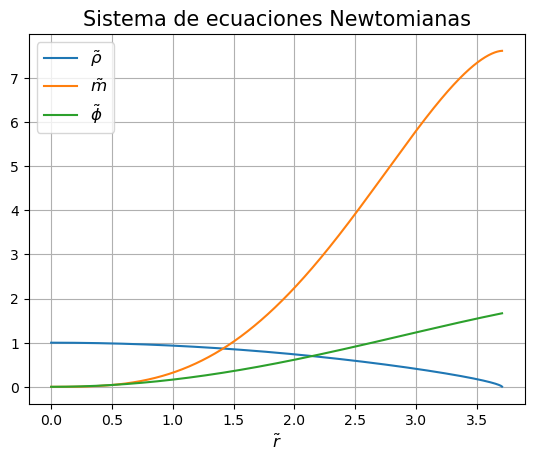

In [5]:
# search the x where rho = 0
lim = len(r)
for i in range(len(x[:,0])):
    if x[i,0] <= 0:
        # print(r[i], x[i,0])
        lim = i
        break

# print(r[lim], x[lim,0])
print('R={:.5f} rho={:.5f}'.format(r[lim-1], x[lim-1,0]))

# plot
plt.plot(r[:lim], x[:lim,0], label=r'$\tilde{\rho}$')
plt.plot(r[:lim], x[:lim,1], label=r'$\tilde{m}$')
plt.plot(r[:lim], x[:lim,2], label=r'$\tilde{\phi}$')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
# plt.plot(r, x[:,0], label='rho')
# plt.plot(r, x[:,1], label='m')
# plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Sistema de ecuaciones Newtomianas', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [9]:
# considerig different gamma
gammas = np.arange(0.8, 1.7, 0.1)
xi = [odeint(NewtOdes, x_0, r, args=(i,)) for i in gammas]

C:\Users\nicom\AppData\Local\Temp\ipykernel_26796\1525188930.py:16: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2
c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


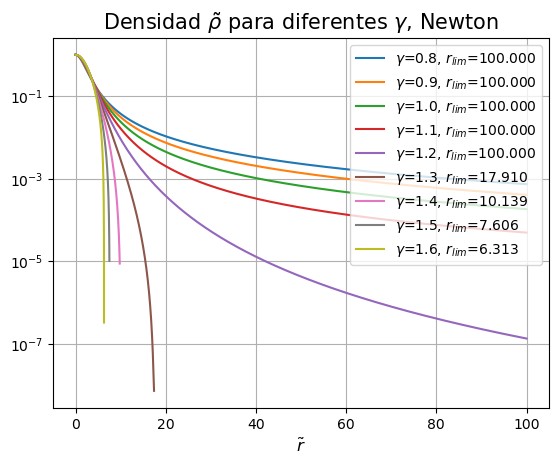

In [10]:
# plot for different gamma
for i in range(len(xi)):
    # search the x where rho = 0
    lim_ = len(r)
    for j in range(len(xi[i][:,0])):
        if xi[i][j,0] <= 0:
            lim_ = j
            break

    # plt.plot(r, xi[i][:,0], label='$\gamma$={}, $r_{{lim}}$={}'.format(gammas[i], r[lim_-1]))
    plt.semilogy(r[:lim_], xi[i][:lim_,0], label='$\gamma$={:.1f}, $r_{{lim}}$={:.3f}'.format(gammas[i], r[lim_-1])) # plot til limit
    # plt.plot(r[lim_-1], xi[i][lim_-1,0], 'o')# plot last point
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Densidad $\\tilde{\\rho}$ para diferentes $\\gamma$, Newton', fontsize=15)
plt.legend(loc="upper right")
plt.grid()
plt.show()

## Relativistic

TOV Equations:

$$\frac{d \hat{m}}{dx}  = x^2  \hat{\rho}$$
$$\frac{d \hat{P}}{dx}  =\frac{- (\hat{\rho} +\hat{P})(\hat{m} + \hat{P} x^3)}{x(x-2\hat{m})}$$
$$\frac{d \hat{\phi}}{dx}  =\frac{2}{ (\hat{\rho} +\hat{P})}\frac{d \hat{P}}{dx} $$

donde
$$ m = M\hat{m}\quad ; \quad r=Rx \quad ; \quad \rho=\rho_0\hat{\rho} \quad ; \quad P=P_0\hat{P} \quad ; \quad \phi=\phi_0\hat{\phi}$$ 

todas la variables de adimencionalizar las escogo en terminos de $\rho_0$:
$$M = 4\pi R^3 \rho_0$$
$$R^2 = \frac{1}{4\pi \rho_0}$$
$$P_0 = \rho_0 $$
$$\phi_0 = 1 $$

La ecuacion de estado queda como:
$$\hat{P}= K \rho_0^{\gamma-1}\hat{\rho}^{\gamma} = \alpha\hat{\rho}^{\gamma} \qquad \rm{with} \qquad \alpha= K \rho_0^{\gamma-1}$$

Si eligo que $\rho_0$ sea la densidad central de la estrella, las condiciones iniciales para TOV son:
$$\hat{\rho}(x=0)=1$$
$$\hat{m}(x=0)=0$$

In [22]:
# Define the ODEs
def RelOdes(x, r, gamma, alpha):
    # a = 4*np.pi*rho_0*R**3/M
    # d = P_0/c**2/rho_0
    # l = G/c**2*M/R
    l = alpha
    # mu = rho_0**gamma/P_0*k

    # Variables
    rho, m, phi = x

    # ODEs
    # drho_dr = -l/d/mu/gamma * rho**(2-gamma)*m/r**2 * (1 + mu*d*rho**(gamma-1)) * (1 + mu/m*a*d*rho**gamma*r**3) / (1 - 2*l*m/r)
    # dm_dr = a*r**2*rho
    # dphi_dr = l*m/r**2 * (1 + mu/m*a*d*rho**gamma*r**3) / (1 - 2*l*m/r)
    # drho_dr = -1/gamma * rho**(2-gamma)*m/r**2 * (1 + l* rho**(gamma-1)) * (1 + l* rho**gamma*r**3/m) / (1 - l* 2*m/r)
    P = l*rho**gamma # Por qué integrar las ecuaciones sin unificarlas?
    drho_dr = - ( rho / ( gamma * P) ) * ( rho + P ) * ( m +  P*r**3 ) / ( r * ( r - 2.0 * m ) )
    dm_dr = r*r*rho # Por qué r*r y no r**2?
    dphi_dr = (2.0 / ( rho + P )) *( gamma*P*drho_dr / rho ) # Lo mismo de arriba
    # dphi_dr = m/r**2 * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)
    return [drho_dr, dm_dr, dphi_dr]

In [23]:
# integration range
rf = 100.0
#NN = 1000
dx = 1e-3 # es mejor definir el dx que el numero de puntos
NN = int(rf/dx)
r = np.linspace(dx, rf, NN)

# parameters for integration
gamma = 2.0
alpha = 0.1

# initial conditions 
rho_0 = 1.0 #- dx**2*8/(6*gamma) # density at dx from the center
# m_0 = 4*np.pi/3*(dx)**3*rho_0 # Este es m físico, no adimensional
m_0 = 0.0#dx**3/3 # Este es m adimensional con rho moño = 1, mass at dx from the center
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# solve ODE
x = odeint(RelOdes, x_0, r, args=(gamma,alpha), rtol=1e-14, atol=1e-12) #Por qué se hace rho = nan (¿0?) tan de repente? 

R=1.16200 rho=0.00028


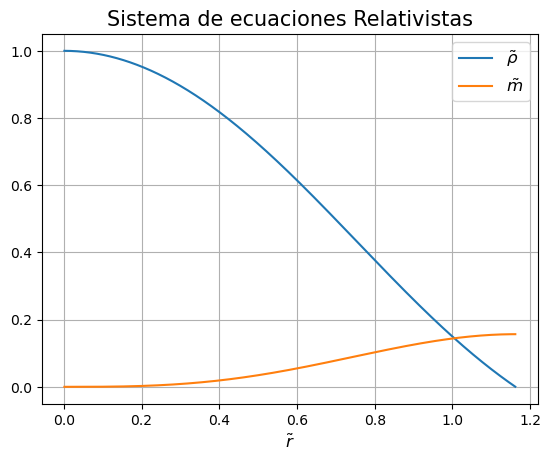

In [26]:
# search the x where rho = 0
lim = len(x[:,0])
for i in range(len(x[:,0])):
    if x[i,0] <= 1e-5: # Por lo general las soluciones no pasa por cero exactamente, uno debe exigir que baje varios ordenes de magnitud
        # print(r[i], x[i,0])
        lim = i
        break

# print(r[lim], x[lim,0])
print('R={:.5f} rho={:.5f}'.format(r[lim-1], x[lim-1,0]))

# plot
plt.plot(r[:lim], x[:lim,0], label=r'$\tilde{\rho}$')
plt.plot(r[:lim], x[:lim,1], label=r'$\tilde{m}$')
# plt.plot(r[:lim], x[:lim,2], label=r'$\tilde{\phi}$')

# plt.plot(r, k*(x[:,0])**gamma, label='P')
# plt.plot(r, x[:,0], label='rho')
# plt.plot(r, x[:,1], label='m')
# plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Sistema de ecuaciones Relativistas', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show() # La integración me queda diferente :')

In [31]:
# considerig different gamma
gammas = np.arange(0.8, 1.7, 0.1)
xi = [odeint(RelOdes, x_0, r, args=(i,alpha)) for i in gammas]

C:\Users\nicom\AppData\Local\Temp\ipykernel_26396\1881399986.py:17: RuntimeWarning: invalid value encountered in scalar power
  P = l*rho**gamma # Por qué integrar las ecuaciones sin unificarlas?
c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


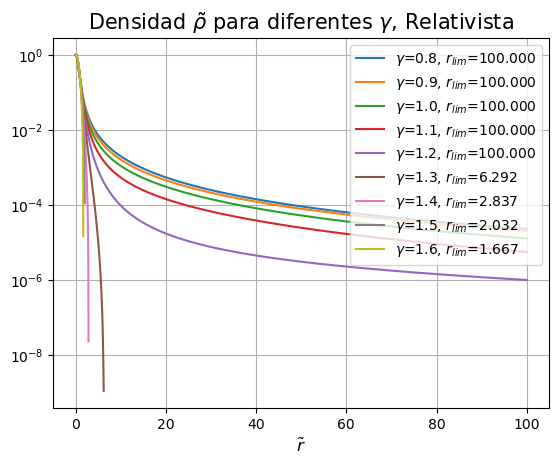

In [36]:
# plot for different gamma
for i in range(len(xi)):
    # search the x where rho = 0
    lim_ = len(r)
    for j in range(len(xi[i][:,0])):
        if xi[i][j,0] <= 0:
            lim_ = j
            break

    # plt.plot(r, xi[i][:,0], label='$\gamma$={}, $r_{{lim}}$={}'.format(gammas[i], r[lim_-1]))
    plt.semilogy(r[:lim_], xi[i][:lim_,0], label='$\gamma$={:.1f}, $r_{{lim}}$={:.3f}'.format(gammas[i], r[lim_-1])) # plot til limit
    # plt.plot(r[lim_-1], xi[i][lim_-1,0], 'o')# plot last point
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Densidad $\\tilde{\\rho}$ para diferentes $\\gamma$, Relativista', fontsize=15)
plt.legend(loc='upper right')
plt.grid()
plt.show() # Ahora todos convergen :D

### Valores Estrella

La densidad central de la estrella la recupero con el valor de $\alpha$:
$$\rho_c = \left(\frac{\alpha}{k}\right)^{1.0/(\gamma-1)}$$

¿Cual seria el valor de la masa y densidad central?

## Relación Masa - Radio

La relacion masa radio se halla variando la densidad central, para este caso, lo equivalente es variar el parametro de $\alpha$

In [38]:
alphass = np.arange(0.01, 0.9, 0.01)
Np = len(alphass)
MR = np.zeros((2,Np))
for i in range(Np):
    x = odeint(RelOdes, x_0, r, args=(2.0, alphass[i]))
    
    lim = len(x[:,0])
    for ii in range(len(x[:,0])):
        if x[ii,0] <= 1e-3:  
            lim = ii
            break

    MR[0,i] = r[lim-1]
    MR[1,i] = x[lim-1,1]
    # print(MR[0,i],MR[1,i])

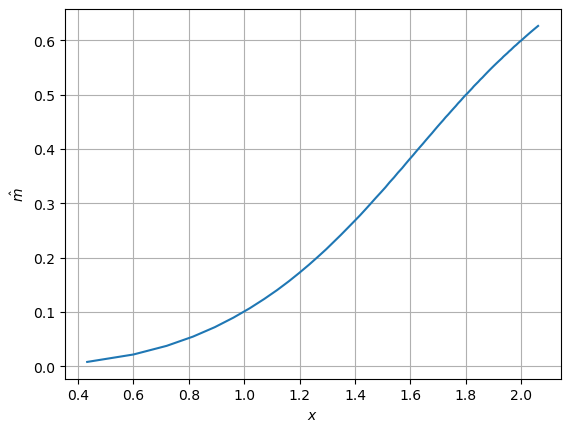

In [39]:
plt.plot(MR[0], MR[1])

plt.xlabel("$x$")
plt.ylabel("$\hat{m}$")
plt.grid()

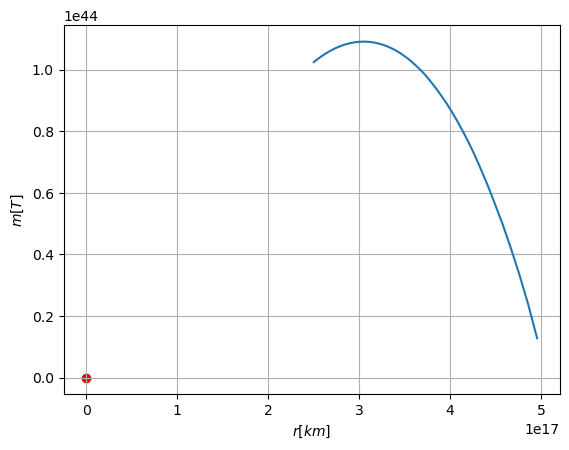

In [65]:
# Recuperar las unidades
import astropy.constants as const
c = const.c.value
G = const.G.value
R_sun = const.R_sun.value
M_sun = const.M_sun.value

k_sun = (P_0_sun/(rho_0_sun*c**2))**(1/gamma)
rhoses = (alphass/k_sun)**(1.0/(gamma-1.0))
Rs = c**2/np.sqrt(4.0*np.pi*G*rhoses)
Ms = 4.0*np.pi*rhoses*Rs**3/c**2
# Rs = 1/np.sqrt(4.0*np.pi*rhoses)
# Ms = 4.0*np.pi*rhoses*Rs**3

plt.plot(Rs*MR[0]/1e3, Ms*MR[1]/1e3)
# plt.plot(Rs[:-10]*MR[0][:-10], Ms[:-10]*MR[1][:-10])
plt.scatter(R_sun/1e3, M_sun/1e3, color='red', label='Sun')
plt.xlabel("$r[km]$") #Si son estas unidades?
plt.ylabel("$m[T]$")
plt.grid()

# Relación entre parámetros y escalas de adimencionalización

k_sun = 0.0051


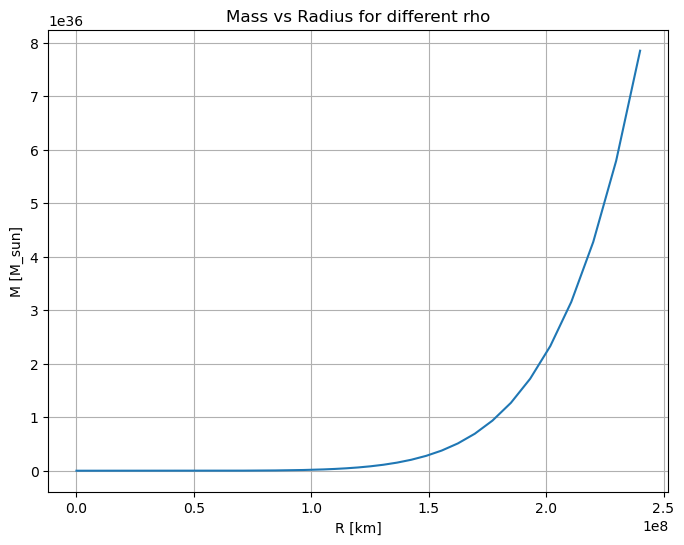

In [10]:
# Estimación de un k con datos del sol
gamma_sun = 2.5
k_sun = (P_0_sun/(rho_0_sun*c**2))**(1/gamma_sun)

print(f'k_sun = {round(k_sun,5)}')

# Parametros de Masa y Radio como función de la densidad central
def M_R(rho_0):
    # Estimación de un k 
    # gamma = 2.5
    # k_sun = (P_0/(rho_0*c**2))**(1/gamma)

    R = (k_sun*rho_0**(gamma_sun-2)/(4*np.pi*G))**(1/2)
    M = 4*np.pi*rho_0*R**3
    return R, M

# Densidades centrales
rho_0s = np.logspace(0, 15, 200)*c**2
# rho_0s = np.linspace(1e5, 1e7, 100)
R, M = np.array([M_R(rho_0)[0] for rho_0 in rho_0s]), np.array([M_R(rho_0)[1] for rho_0 in rho_0s])

# Plot
plt.figure(figsize=(8,6))
plt.plot(R*10**(-3), M/const.M_sun.value)
# R_teo = np.linspace(0, 2.3e8, 100)
# plt.loglog(R_teo, 4*np.pi*(4*np.pi*G/k_sun)**1/(gamma_sun-2)*R_teo**(3+2/(gamma_sun-2)))
plt.xlabel('R [km]')
plt.ylabel('M [M_sun]')
plt.title('Mass vs Radius for different rho')
plt.grid(True)
plt.show()

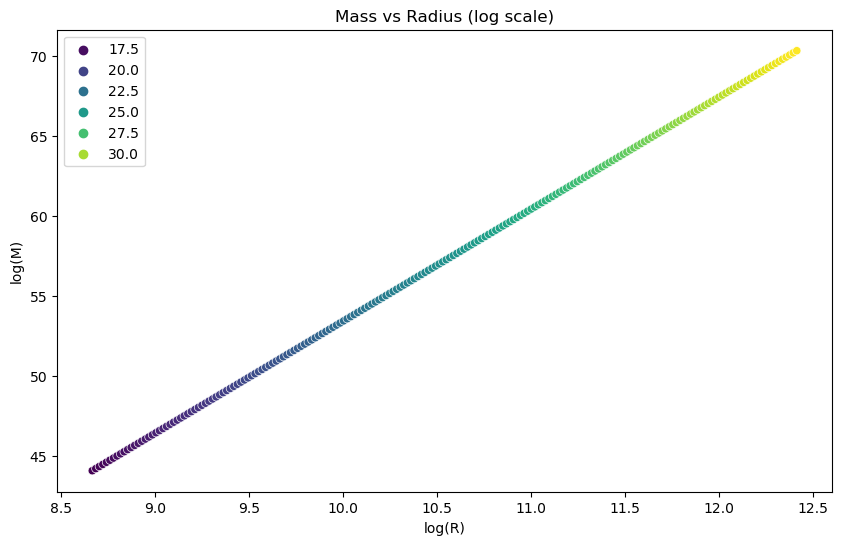

In [10]:
import seaborn as sns

# Create the plot
# sns.set_theme('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log10(R), y=np.log10(M), hue=np.log10(rho_0s), palette="viridis")

# Set labels and title
plt.xlabel("log(R)")
plt.ylabel("log(M)")
plt.title("Mass vs Radius (log scale)")

# Add color map for hue
# cbar = plt.colorbar()
# cbar.set_label("rho_0s")

# Show the plot
plt.show()

# Masa y radio de la estrella según su densidad central

## Newtonian

C:\Users\nicom\AppData\Local\Temp\ipykernel_18092\1525188930.py:16: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2


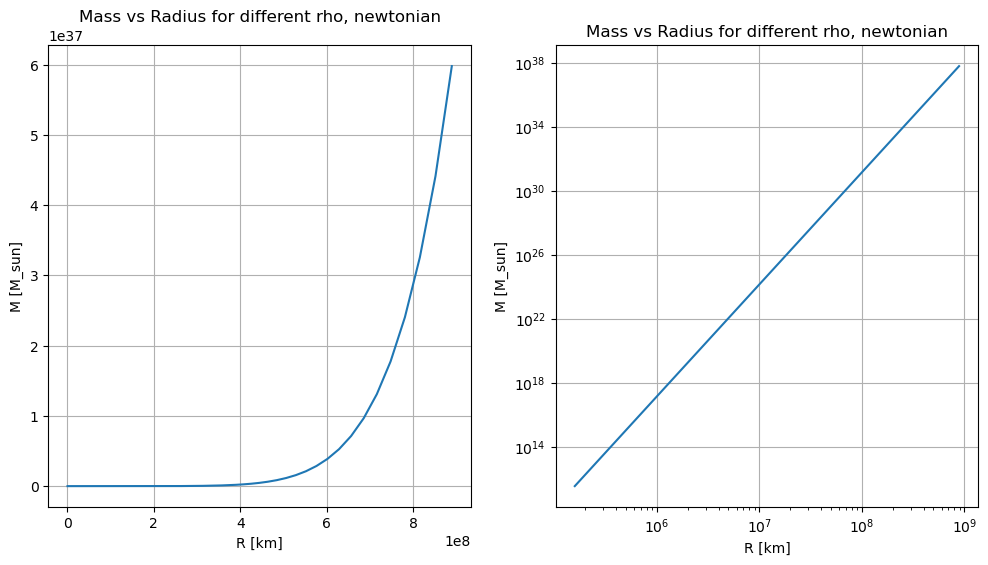

In [7]:
# Estimación de un k con datos del sol
gamma_sun = 2.5
k_sun = (P_0_sun/(rho_0_sun*c**2))**(1/gamma_sun)

# Definición de las condiciones iniciales
rho_0 = 1.0 - dx**2/(6*gamma_sun) # density at dx from the center
m_0 = dx**3/3 # Este es m adimensional con rho moño = 1, mass at dx from the center
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# Definición del rango de integración
rf = 100.0
dx = 1e-3 # es mejor definir el dx que el numero de puntos
NN = int(rf/dx)
r = np.linspace(dx, rf, NN)

# Solución de las ecuaciones
x = odeint(NewtOdes, x_0, r, args=(gamma_sun,))

# Búsqueda del radio donde rho = 0
for i in range(len(x[:,0])):
    if x[i,0] <= 0:
        lim = i
        break

# Obtención de la masa y radio resolviendo las ecuaciones
def MasaRadio(rho_0_star):
    # Masa y radio adimensional, checkeando que la masa no sea nan
    i = 1
    while np.isnan(x[lim-i,1]):
        i += 1
    Rhat = r[lim-i]
    Mhat = x[lim-i,1]

    # Parametros de Masa y Radio como función de la densidad central
    R = (k_sun*rho_0_star**(gamma_sun-2)/(4*np.pi*G))**(1/2)
    M = 4*np.pi*rho_0_star*R**3
    return R*Rhat, M*Mhat

# Densidades centrales
rho_0s = np.logspace(0, 15, 200)*c**2

# Masa y radio
R_star, M_star = np.array([MasaRadio(rho_0)[0] for rho_0 in rho_0s]), np.array([MasaRadio(rho_0)[1] for rho_0 in rho_0s])

# Plot
# plt.figure(figsize=(8,6))
# plt.plot(R_star/10**3, M_star/M_sun)
# plt.xlabel('R [km]')
# plt.ylabel('M [M_sun]')
# plt.title('Mass vs Radius for different rho, newtonian')
# plt.grid(True)
# plt.show()

# Subplots for normal and log scale
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(R_star/10**3, M_star/M_sun)
axs[0].set_xlabel('R [km]')
axs[0].set_ylabel('M [M_sun]')
axs[0].set_title('Mass vs Radius for different rho, newtonian')
axs[0].grid(True)

axs[1].loglog(R_star/10**3, M_star/M_sun)
axs[1].set_xlabel('R [km]')
axs[1].set_ylabel('M [M_sun]')
axs[1].set_title('Mass vs Radius for different rho, newtonian')
axs[1].grid(True)

plt.show()

## Relativistic

C:\Users\nicom\AppData\Local\Temp\ipykernel_18092\347593805.py:16: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2 * (1 + l* rho**(gamma-1)) * (1 + l* rho**gamma*r**3/m) / (1 - l* 2*m/r)
C:\Users\nicom\AppData\Local\Temp\ipykernel_18092\347593805.py:18: RuntimeWarning: invalid value encountered in scalar power
  dphi_dr = m/r**2 * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)


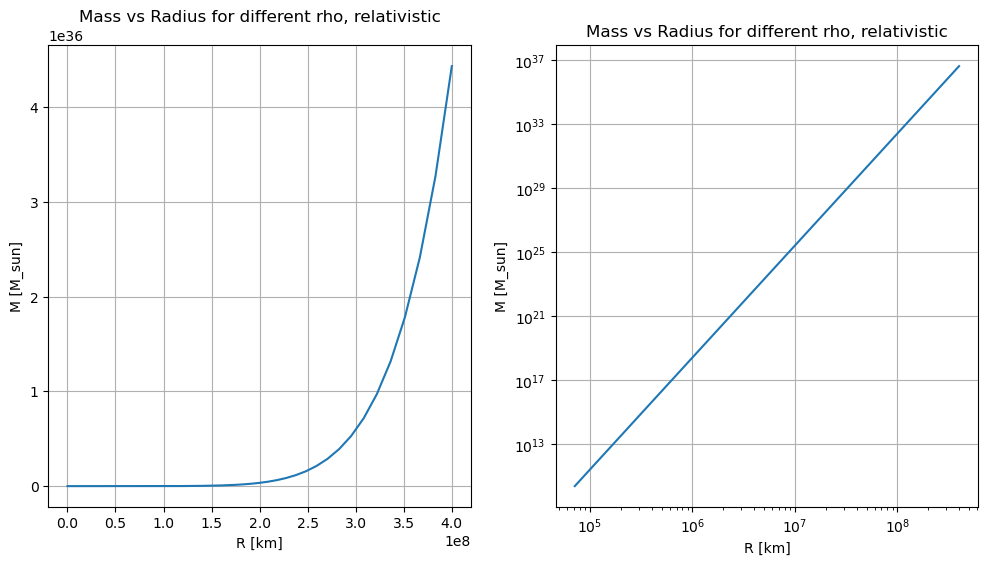

In [8]:
# Definición de las condiciones iniciales
rho_0 = 1.0 - dx**2*8/(6*gamma_sun) # density at dx from the center
m_0 = dx**3/3 # Este es m adimensional con rho moño = 1, mass at dx from the center
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# Solución de las ecuaciones
x = odeint(RelOdes, x_0, r, args=(gamma_sun,))

# Búsqueda del radio donde rho = 0
for i in range(len(x[:,0])):
    if x[i,0] <= 0:
        lim = i
        break

# Masa y radio
R_star_rel, M_star_rel = np.array([MasaRadio(rho_0)[0] for rho_0 in rho_0s]), np.array([MasaRadio(rho_0)[1] for rho_0 in rho_0s])

# Plot
# plt.figure(figsize=(8,6))
# plt.plot(R_star_rel/10**3, M_star_rel/M_sun)
# plt.xlabel('R [km]')
# plt.ylabel('M [M_sun]')
# plt.title('Mass vs Radius for different rho, relativistic')
# plt.grid(True)
# plt.show()

# Subplots for normal and log scale
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(R_star_rel/10**3, M_star_rel/M_sun)
axs[0].set_xlabel('R [km]')
axs[0].set_ylabel('M [M_sun]')
axs[0].set_title('Mass vs Radius for different rho, relativistic')
axs[0].grid(True)

axs[1].loglog(R_star_rel/10**3, M_star_rel/M_sun)
axs[1].set_xlabel('R [km]')
axs[1].set_ylabel('M [M_sun]')
axs[1].set_title('Mass vs Radius for different rho, relativistic')
axs[1].grid(True)

plt.show()

## Comparación

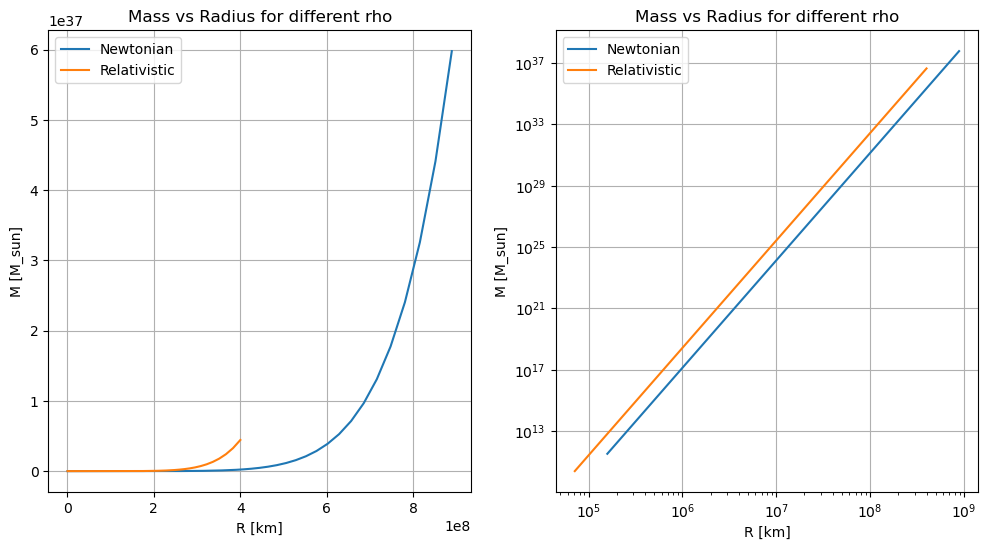

In [9]:
# Plot de las dos soluciones
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(R_star/10**3, M_star/M_sun, label='Newtonian')
axs[0].plot(R_star_rel/10**3, M_star_rel/M_sun, label='Relativistic')
axs[0].set_xlabel('R [km]')
axs[0].set_ylabel('M [M_sun]')
axs[0].set_title('Mass vs Radius for different rho')
axs[0].grid(True)
axs[0].legend()

axs[1].loglog(R_star/10**3, M_star/M_sun, label='Newtonian')
axs[1].loglog(R_star_rel/10**3, M_star_rel/M_sun, label='Relativistic')
axs[1].set_xlabel('R [km]')
axs[1].set_ylabel('M [M_sun]')
axs[1].set_title('Mass vs Radius for different rho')
axs[1].grid(True)
axs[1].legend()

plt.show()